In [1]:
# seaborn的依赖包： numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style='darkgrid')

## scatter plots

`scatterplot()`是`relplot()`函数的默认绘制类型(`kind`)

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


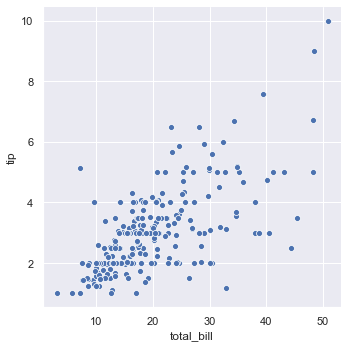

In [3]:
sns.relplot(x='total_bill', y='tip', data=tips)

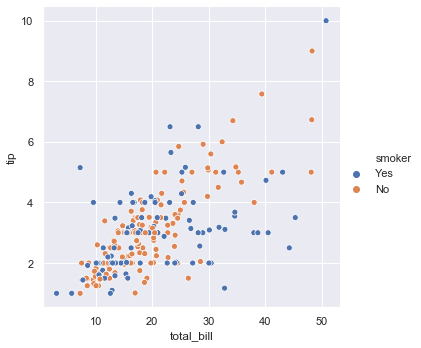

In [4]:
# 通过使用 `hue` semantic来对不同类别的数据进行区分
# ;后缀可以不显示图片对象的信息
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips);

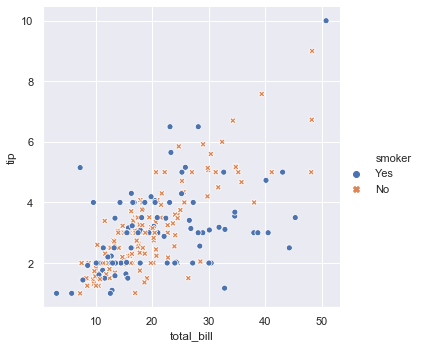

In [9]:
# 为了使得不同的类别之间区分效果更好，可以对某个类别指定样式
# 这里对smoker指定了样式
sns.relplot(x='total_bill', y='tip', hue='smoker', style='smoker',
                                                        data=tips);

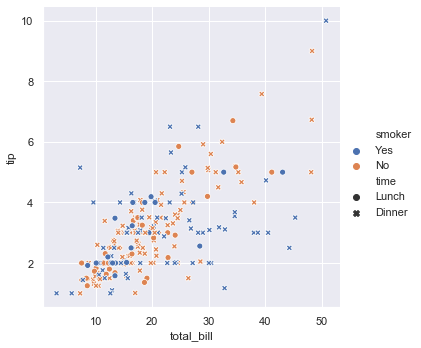

In [10]:
# 对time指定样式，同时表示四个变量
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time',
                                                        data=tips);

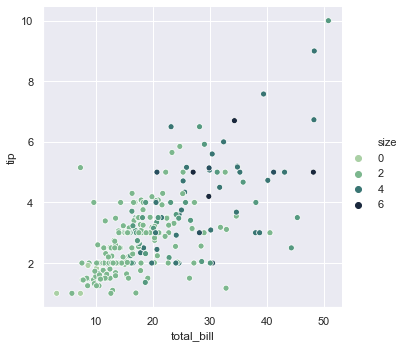

In [12]:
# 改变数据点的颜色样式 palette
sns.relplot(x='total_bill', y='tip', hue='size', palette='ch:r=-.5, l=.75',
                                                        data=tips);

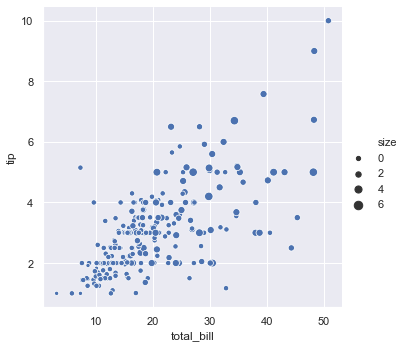

In [13]:
# 根据数据不同的数值，来设置其数据点的大小
# 这里根据用餐人的数目size来做区分
sns.relplot(x='total_bill', y='tip', size='size', data=tips);

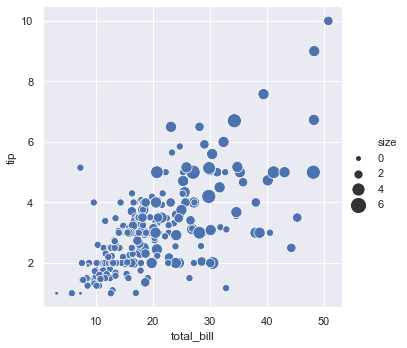

In [16]:
# 此外，可以配合sizes参数，设置不同size的数据点的大小范围
sns.relplot(x='total_bill', y='tip', size='size', sizes=(15, 200),
                                                        data=tips);

在此例中，范围（15，200）被划分为4个等距size,分别赋予"size"属性中的0，2，4，6。

---
## Line plots

对于某些数据，我们像观察其走向等趋势信息，可以绘制 `line plot`，以此从图像中获取信息。

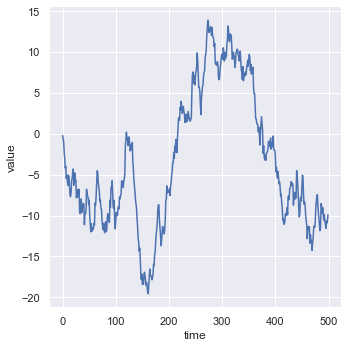

In [21]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate()  # 自动格式化显示方式

> 注意： `.fig.autofmt_xdate()` 需要用在填充数据之后。

另一个需要注意的是，`lineplot`假设我们想绘制的是以x为自变量，y为因变量的图，于是默认会对x的值进行排序，然后再绘制数据。我们可设置`sort`参数来取消：

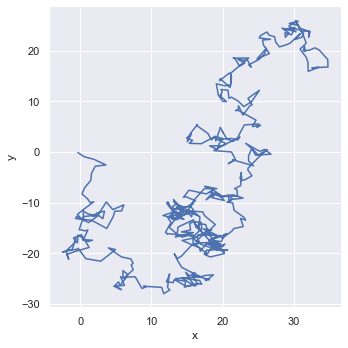

In [31]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

---
## Aggregation and representing uncertainty

对于复杂的数据集，我们可能需要使用多种衡量方法来观察数据。同时我们可以使用置信区间来对数据的某些特征进行估计。

In [45]:
fmri = sns.load_dataset('fmri')
fmri.head(-5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1054,s5,8,cue,frontal,-0.028292
1055,s4,8,cue,frontal,-0.160821
1056,s3,8,cue,frontal,-0.033848
1057,s2,8,cue,frontal,-0.069666


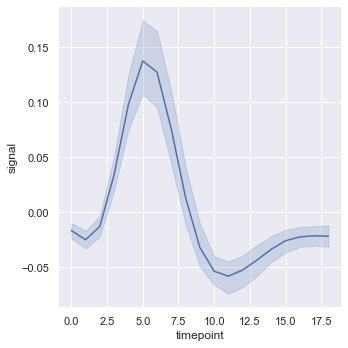

In [34]:
sns.relplot(x="timepoint", y='signal', kind="line", data=fmri);

> The confidence intervals are computed using [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping), which can be time-intensive for larger datasets.

对于大的数据集，为了提高程序运行效率，可以将置信区间参数设置为None.

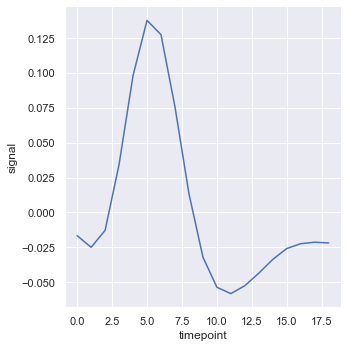

In [36]:
sns.relplot(x="timepoint", y='signal', ci=None, kind='line', data=fmri);

对于较大的数据，通过绘制标准差来表示分布在每个时间点上数据的可能的扩展域是个较好的选择:

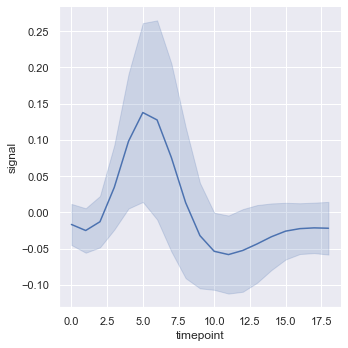

In [37]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

对于`estimator`,当设置其为None时，在数据集中每个点有很多不同的观察值的情况下，可能对绘制结果产生一些奇怪的效应：

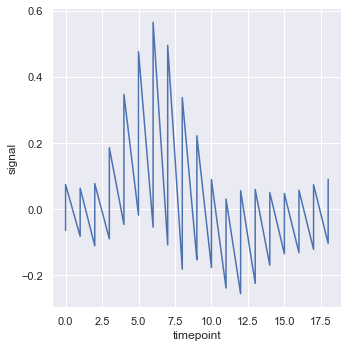

In [38]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

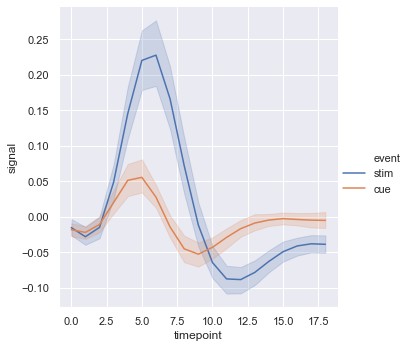

In [39]:
# 使用语义映射（semantic mappings）
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

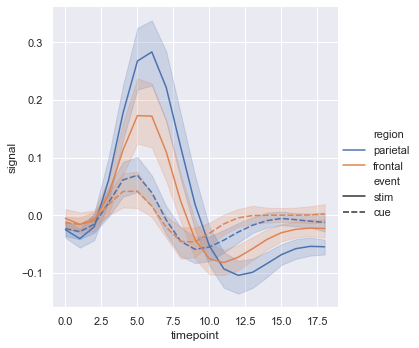

In [40]:
# 同时可以结合上文中的style等参数
sns.relplot(x="timepoint", y="signal", 
            kind="line", style="event",
            hue="region", data=fmri);

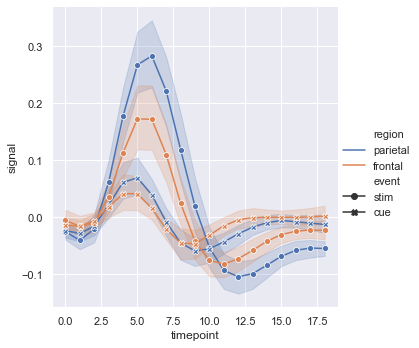

In [43]:
# 此外，我们还可以使用markder对每个观察值进行标记，增加可视化效果
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

---
默认的colormap设置取决于hue语义是类别型(categorical)的还是数值型的。
为了增强可视化效果，我们可以设置颜色的变化形式，使得绘出的曲线具有可读性。

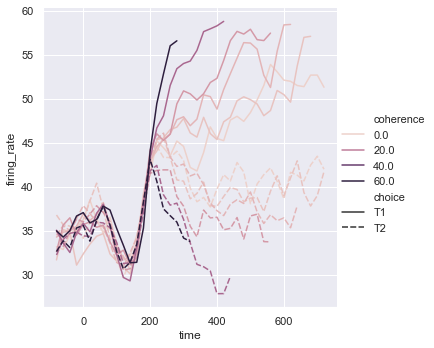

In [47]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

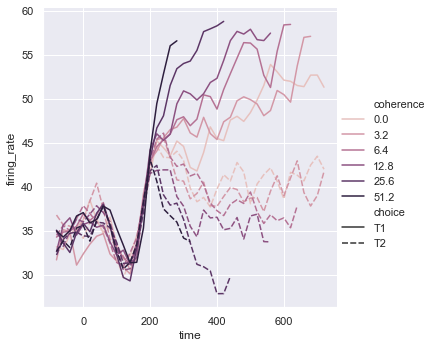

In [48]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)  # 设置颜色的亮度以及颜色的个数
sns.relplot(x="time", y="firing_rate",
            hue='coherence', style="choice",
            palette=palette,
            kind="line", data=dots);

> In this case, the levels of the hue variable are **logarithmically** scaled.

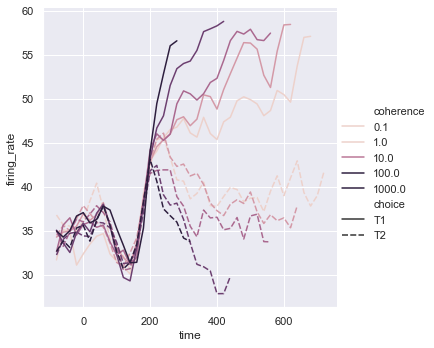

In [53]:
# colormap的缩放尺度可以自行设置
from matplotlib.colors import LogNorm

sns.relplot(x="time", y="firing_rate",
            hue='coherence', style="choice",
            hue_norm = LogNorm(),
            kind="line", data=dots);

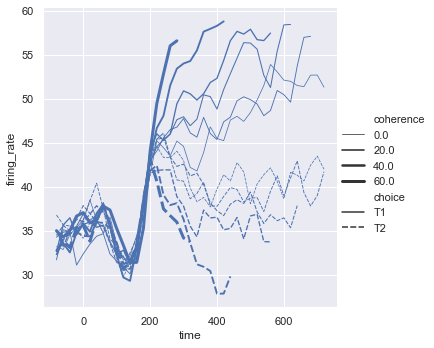

In [54]:
# 设置曲线的粗细(size)
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

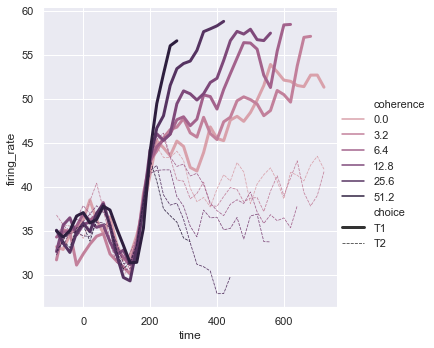

In [56]:
# 增加调色
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice", 
           palette=palette, style="choice",
           kind="line", data=dots);

---
## Showing multiple relationships with facets

`relplot()` is based on the FacetGrid.

FacetGrid is parameterized by the height and aspect ratio of each facet:

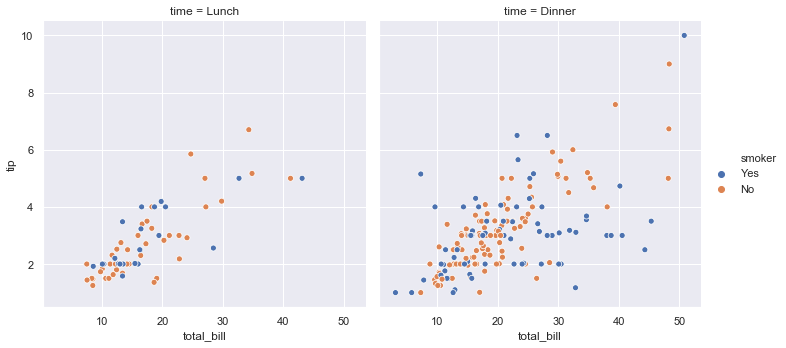

In [57]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);  

> 通过`col`参数，设置绘制多个图来观察数据。

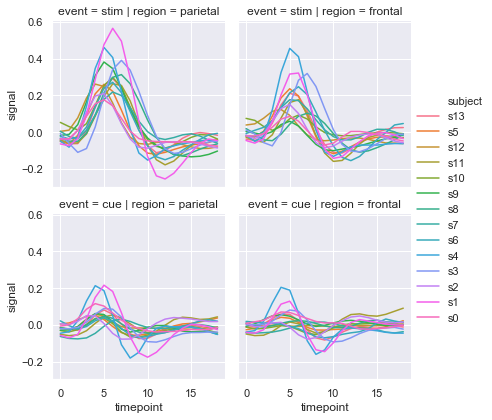

In [58]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,  # 设置图片facet的尺寸
            kind="line", estimator=None, data=fmri);

* `col_wrap`: 设置列数
* `height` & `aspect` : 设置每个facet的尺寸
* `linewidth`: 设置曲线宽度

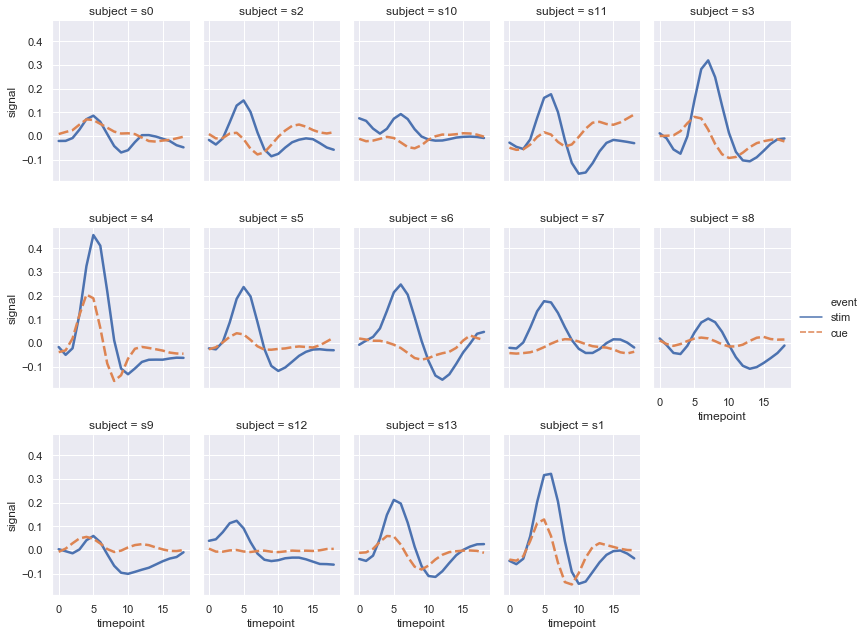

In [63]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));